In [1]:
import pandas as pd

In [3]:
s = pd.Series(data=[1,2,'three'], index=['id1', 'id2', 'id3'])
s = pd.Series({'id1': 1, 'id2': 2, 'id3': 'three'})
s

id1        1
id2        2
id3    three
dtype: object

In [4]:
pd.Series()

'three'

In [11]:
df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
    index=['row_1', 'row_2', 'row_3'],
    columns=["col_a", "col_b", "col_c"]
)
df

,col_a,col_b,col_c
row_1,4,7,10
row_2,5,8,11
row_3,6,9,12


In [18]:
columns = ['col_a', 'col_b']
df[columns]

,col_a,col_b
row_1,4,7
row_2,5,8
row_3,6,9


In [20]:
apples  = pd.Series(data=[1, 2, 3], index=["id1", "id2", "id3"])
oranges = pd.Series(data=[4, 5, 6], index=["id1", "id2", "id4"])
d = {
    "Apples": apples,
    "Oranges": oranges,
}
pd.DataFrame(d)

,Apples,Oranges
id1,1.0,4.0
id2,2.0,5.0
id3,3.0,NaN
id4,NaN,6.0


# Exploratory Data Analysis

In [21]:
!curl -s -L https://lew.ag/countries-dataset > countries.csv

In [22]:
!ls

Data Analysis               Untitled.ipynb
Data Analysis Lecture.ipynb countries.csv


In [24]:
!head -n 5 countries.csv

Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
"Afghanistan ","ASIA (EX. NEAR EAST)         ",31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
"Albania ","EASTERN EUROPE                     ",3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
"Algeria ","NORTHERN AFRICA                    ",32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
"American Samoa ","OCEANIA                            ",57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,


In [84]:
countries_df = pd.read_csv('countries.csv')

In [27]:
countries_df.shape

(227, 20)

In [28]:
countries_df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [29]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [30]:
countries_df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [32]:
countries_df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [35]:
countries_df.tail(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
217,Vanuatu,OCEANIA,208869,12200,"17,1","20,72",0,"55,16",2900.0,"53,0","32,6","2,46","7,38","90,16",2,"22,72","7,82","0,26","0,12","0,62"
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,"56,9","9,84","-8,94","8,03",17200.0,NaN,"652,8","11,76","2,94","85,3",2,"13,96","6,43","0,01","0,19","0,8"
221,Wallis and Futuna,OCEANIA,16025,274,"58,5","47,08",NaN,NaN,3700.0,"50,0","118,6",5,25,70,2,NaN,NaN,NaN,NaN,NaN
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"


In [48]:
countries_df.loc['Country'][5]

'Angola '

In [49]:
big_countries = []
for index, country in countries_df.iterrows():
    if country['Population'] >= 1_000_000_000:
        big_countries.append(country)
pd.DataFrame(big_countries)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"


In [53]:
# mask = countries_df['Population'] > 1_000_000_000
countries_df[countries_df['Population'] > 1_000_000_000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"


In [55]:
countries_df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [71]:
american_countries = countries_df[~countries_df['Region'].str.contains('AMER')]
american_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [67]:
countries_df['Region'] = countries_df['Region'].str.strip()
countries_df['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [69]:
countries_df[~countries_df['Region'].isin(['WESTERN EUROPE', 'EASTERN EUROPE'])].head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
12,Austria,WESTERN EUROPE,8192880,83870,"97,7","0,00",2,"4,66",30000.0,"98,0","452,2","16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678"
19,Belgium,WESTERN EUROPE,10379067,30528,"340,0","0,22","1,23","4,68",29100.0,"98,0","462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,"88,0","0,04","0,31","21,05",6100.0,NaN,"215,4","13,6","2,96","83,44",4,"8,77","8,27","0,142","0,308","0,55"


In [74]:
countries_df.set_index('Country', inplace=True)
# countries_df = countries_df.set_index('Country')

In [77]:
countries_df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"


In [85]:
countries_df['Country'] = countries_df['Country'].map(str.strip)
countries_df.set_index('Country', inplace=True)

In [86]:
countries_df.loc['France':'Germany', ['Region', 'Population']]

,Region,Population
Country,,
France,WESTERN EUROPE,60876136
French Guiana,LATIN AMER. & CARIB,199509
French Polynesia,OCEANIA,274578
Gabon,SUB-SAHARAN AFRICA,1424906
"Gambia, The",SUB-SAHARAN AFRICA,1641564
Gaza Strip,NEAR EAST,1428757
Georgia,C.W. OF IND. STATES,4661473
Germany,WESTERN EUROPE,82422299


In [89]:
countries_df.sort_index(ascending=False)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"
Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [91]:
countries_df.sort_values('Population', ascending=False)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9","52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nauru,OCEANIA,13287,21,"632,7","142,86",0,"9,95",5000.0,NaN,"143,0",0,0,100,2,"24,76","6,7",NaN,NaN,NaN
Tuvalu,OCEANIA,11810,26,"454,2","92,31",0,"20,03",1100.0,NaN,"59,3",0,0,100,2,"22,18","7,11","0,166","0,272","0,562"
Montserrat,LATIN AMER. & CARIB,9439,102,"92,5","39,22",0,"7,35",3400.0,"97,0",NaN,20,0,80,2,"17,59","7,1",NaN,NaN,NaN


In [95]:
countries_df.groupby('Region').sum().sort_values('Population', ascending=False)

,Population,Area (sq. mi.),GDP ($ per capita)
Region,,,
ASIA (EX. NEAR EAST),3687982236,23096712,225500.0
SUB-SAHARAN AFRICA,749437000,24341406,118500.0
LATIN AMER. & CARIB,561824599,20544084,390700.0
WESTERN EUROPE,396339998,3710478,757300.0
NORTHERN AMERICA,331672307,21782471,130500.0
C.W. OF IND. STATES,280081548,22100843,48000.0
NEAR EAST,195068377,4355586,167300.0
NORTHERN AFRICA,161407133,6018890,27300.0
EASTERN EUROPE,119914717,1152222,117700.0


In [99]:
import matplotlib

In [100]:
gdp = 'GDP ($ per capita)'
top_ten_countries_df = countries_df[[gdp]] \
    .sort_values(gdp, ascending=False) \
    .head(10)

top_ten_countries_df

,GDP ($ per capita)
Country,
Luxembourg,55100.0
Norway,37800.0
United States,37800.0
Bermuda,36000.0
Cayman Islands,35000.0
San Marino,34600.0
Switzerland,32700.0
Denmark,31100.0
Iceland,30900.0


<AxesSubplot:xlabel='Country'>

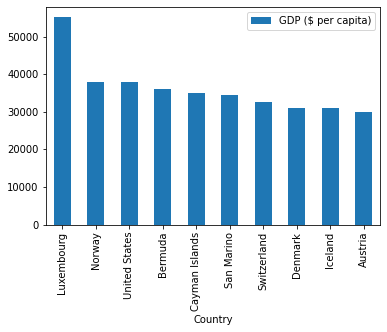

In [101]:
top_ten_countries_df.plot(kind='bar')